In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img1 = cv2.imread("./dataset/img/img_1.jpg")
img2 = cv2.imread("./dataset/img/img_1.jpg")


def doHarris(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    dst = cv2.cornerHarris(gray, 2, 3, 0.01)


    # result is dilated for marking the corners, not important
    dst = cv2.dilate(dst, None)

    # Threshold for an optimal value, it may vary depending on the image.
    img[dst > 0.01 * dst.max()] = [0, 0, 255]


    return img


churchLeftHarris = doHarris(img1)
churchRightHarris = doHarris(img2)

hor = np.hstack((churchLeftHarris, churchRightHarris))

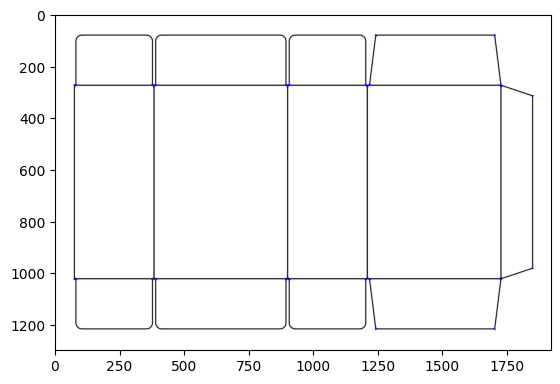

In [8]:
plt.imshow(churchLeftHarris)

In [9]:
def correlation_coefficient(window1, window2):
    product = np.mean((window1 - window1.mean()) * (window2 - window2.mean()))
    stds = window1.std() * window2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        return product

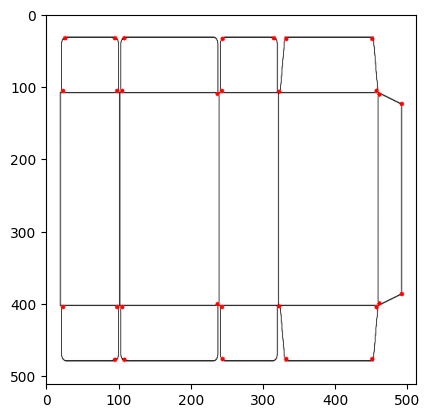

Similarity score: -341061.78571428574


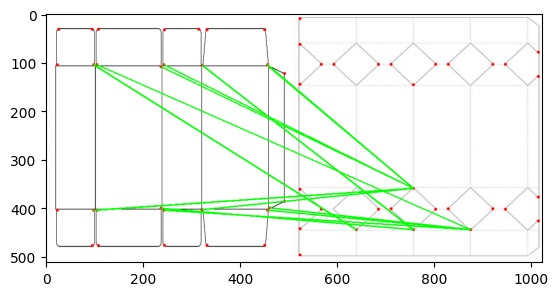

Similarity score: 0.9082268261295193


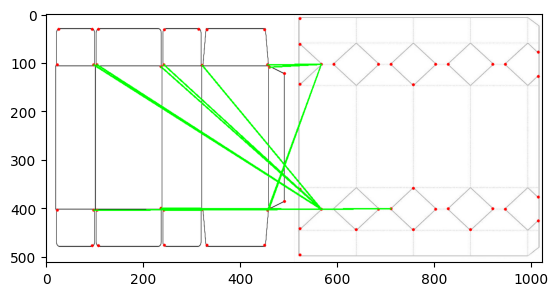

In [41]:
window_size_width = 50
window_size_height = 50
lineThickness = 2

img1 = cv2.imread('./dataset/img/img_1.jpg')
img2 = cv2.imread('./dataset/img/img_56.jpg')
img1 = cv2.resize(img1, (512, 512))
img2 = cv2.resize(img2, (512, 512))

width, height, ch = img1.shape[::]
img2_copy = img2.copy()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


corners1 = cv2.goodFeaturesToTrack(gray1, 30, 0.01, 5)
corners1 = np.int0(corners1)

corners2 = cv2.goodFeaturesToTrack(gray2, 30, 0.01, 5)
corners2 = np.int0(corners2)

corners_windows1 = []

for i in corners1:
    x, y = i.ravel()
    cv2.circle(img1, (x, y), 3, 255, -1)

corners_windows2 = []
for i in corners2:
    x, y = i.ravel()
    cv2.circle(img2, (x, y), 3, 255, -1)

plt.imshow(img1), plt.show()

methods = ['SSD', 'NCC']
for method in methods:
    matches = []
    scores = []
    for id1, i in enumerate(corners1):
        x1, y1 = i.ravel()
        if y1 - window_size_height < 0 or y1 + window_size_height > height or x1 - window_size_width < 0 or x1 + window_size_width > width:
            continue
        pt1 = (x1, y1)
        template = img1[y1 - window_size_height:y1 + window_size_height, x1 - window_size_width:x1 + window_size_width]
        max_val = 0
        Threshold = 1000000
        id_max = 0
        for id2, i in enumerate(corners2):
            x2, y2 = i.ravel()

            if y2 - window_size_height < 0 or y2 + window_size_height > height or x2 - window_size_width < 0 or x2 + window_size_width > width:
                continue
            window2 = img2[y2 - window_size_height:y2 + window_size_height,
                      x2 - window_size_width:x2 + window_size_width]
            if method == 'SSD':
                temp_min_val = np.sum((template - window2) ** 2)
            elif method == 'NCC':
                temp_min_val = correlation_coefficient(template, window2)
            if temp_min_val < Threshold:
                Threshold = temp_min_val
                pt2 = (x2 + img1.shape[1], y2)
        scores.append(Threshold)
        matches.append((pt1, pt2))
    stacked_img = np.hstack((img1, img2))
    print("Similarity score:", 1 - abs(np.array(scores).mean()))
    #show the first 15 matches
    for match in matches[:15]:
        cv2.line(stacked_img, match[0], match[1], (0, 255, 0), lineThickness)
    matches = [] 
    scores = []
    plt.imshow(stacked_img), plt.show()

In [42]:
img1.shape[1]

512